In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
airline = pd.read_csv(r"airline_passengers.csv" , index_col = "Month" , parse_dates = True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [13]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [14]:
# first check is there any NaN value in df

# airline.info()             # recommended

# if it's there then drop it using : airline.dropna(inplace = True)

# checking NaN value in 'Thousands of Passengers'
airline[airline['Thousands of Passengers'].isna()]

,Thousands of Passengers
Month,


In [6]:
# if due to nan values in df below syntax is not working to parse_Dates = True , then use

# airline.index = pd.to_datetime(airline.index)

## <span style = 'background:lightblue'>4. Moving Average(MA)</span>

### <span style = 'background :#FFD580'>(i). SMA (Simple moving average)</span>

In [15]:
# 6-month simple moving average(SMA)
airline['6-month_SMA'] = airline['Thousands of Passengers'].rolling(window = 6).mean()

# 12-month simple moving average(SMA)
airline['12-month_SMA'] = airline['Thousands of Passengers'].rolling(window = 12).mean()

airline.head(13)

,Thousands of Passengers,6-month_SMA,12-month_SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


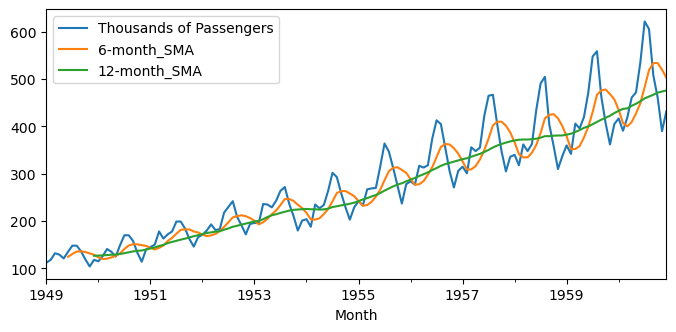

In [17]:
airline.plot(kind = 'line' , figsize = (8,3.5))
plt.show()

#### <span style = 'background : #FFCCCB'>Basic SMA has some weaknesses:</span>

- Smaller windows will lead to more noise, rather than signal.
- It will always lag by the size of the window.
- It will never reach to full peak or valley of the data due to the averaging.
- Does not really inform us about possible future behavior, all it really does is describe trends in our data.
- Extreme historical values can skew our SMA significantly.
- To help fix some of these issues, we can use an EWMA (Exponentially weighted moving average).

### <span style = 'background:#FFD580'>(ii). EWMA : Exponential weighted moving average </span>

- EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that
  occured more recently (by applying more weight to the more recent values, thus the name).<br>
  <br>
- The amount of weight applied to the most recent values will depend on the actual parameters used in   the EWMA and the number of periods given a window size

In [18]:
airline['EWMA-6'] = airline['Thousands of Passengers'].ewm(span = 6).mean()
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span = 12).mean()
airline.head(13)

,Thousands of Passengers,6-month_SMA,12-month_SMA,EWMA-6,EWMA-12
Month,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000
1949-02-01,118,NaN,NaN,115.500000,115.250000
1949-03-01,132,NaN,NaN,122.917431,121.787529
1949-04-01,129,NaN,NaN,125.266892,124.064224
1949-05-01,121,NaN,NaN,123.769332,123.231685
1949-06-01,135,124.500000,NaN,127.469517,126.092005
1949-07-01,148,130.500000,NaN,133.950151,130.980697
1949-08-01,148,135.500000,NaN,138.256171,134.532364
1949-09-01,136,136.166667,NaN,137.578764,134.822714


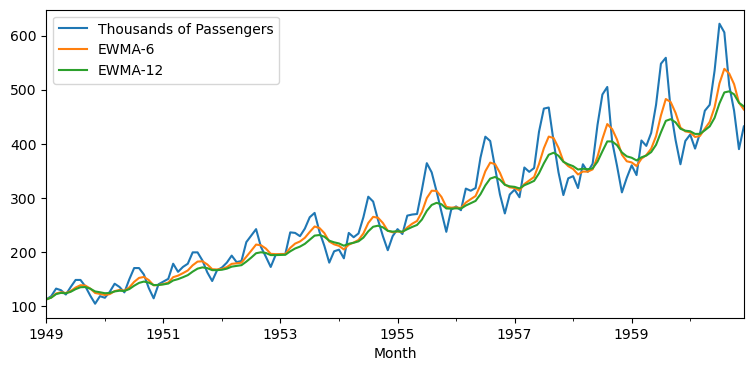

In [22]:
airline[['Thousands of Passengers','EWMA-6','EWMA-12']].plot(kind = 'line' ,figsize = (9,4))
plt.show()

<div class = "alert alert-danger">1. In Exponentially Weighted Moving Averages <b>(EWMA)</b>, we applied Simple Exponential Smoothing <b>(SEM)</b> using just one smoothing factor <b>𝛼(alpha)</b>. 

<br>2. This failed to account for other contributing factors like <b>trend</b> and <b>seasonality</b>.

<br>3.These drawbacks are overcome by applying <b>Double</b> and <b>Triple Exponential Smoothing</b> using Holt-Winters Methods.</div>

#### Second approch : calculating EWM for span = 12 months

- span = 12 
- alpha = 2/(span +1)
- df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha  = alpha , adjust= False).mean()